# Importing Dependencies

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('Dependencies Imported')

Dependencies Imported


In [2]:
data = pd.read_csv("Coursera.csv")
data.head(5)

,course_id,Course_Name,Tenant,Difficulty_Level,rating,Course_URL,Course_Description,Skills,members
0,32281,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,9.37,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,200630
1,5114,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,9.26,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,793665
2,28977,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,9.25,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,114262
3,9253,Finance for Managers,IESE Business School,Intermediate,9.17,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,673572
4,9969,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,9.16,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...,151266


# Basic Data Analysis

In [3]:
data.shape #3522 courses and 7 columns with different attributes

(3522, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   course_id           3522 non-null   int64  
 1   Course_Name         3522 non-null   object 
 2   Tenant              3522 non-null   object 
 3   Difficulty_Level    3522 non-null   object 
 4   rating              3522 non-null   float64
 5   Course_URL          3522 non-null   object 
 6   Course_Description  3522 non-null   object 
 7   Skills              3522 non-null   object 
 8   members             3522 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 247.8+ KB


In [5]:
user = pd.read_csv('rating1.csv')


In [6]:
user.head(10)


,user_id,course_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


In [7]:
# User 1 has a negative in rating mean

user[user['user_id'] == 3].rating.mean()

7.382978723404255

Calculate mean rating per user

In [8]:
MRPU = user.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['rating']

MRPU.drop(['course_id','rating'],axis=1, inplace=True)

In [9]:
MRPU.head(10)

,user_id,mean_rating
0,1,-0.712418
1,2,2.666667
2,3,7.382979
3,4,-1.000000
4,5,4.263383
5,6,-1.000000
6,7,7.387755
7,8,8.333333
8,9,8.000000
9,10,2.875000


In [10]:
user = pd.merge(user,MRPU,on=['user_id'])

In [11]:
user.head(5)


,user_id,course_id,rating,mean_rating
0,1,20,-1,-0.712418
1,1,24,-1,-0.712418
2,1,79,-1,-0.712418
3,1,226,-1,-0.712418
4,1,241,-1,-0.712418


In [12]:
user = user.drop(user[user.rating < user.mean_rating].index)


In [13]:
user[user['user_id']== 1].head(10)


,user_id,course_id,rating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418


In [14]:
user["user_id"].unique()


array([    1,     2,     3, ..., 10091, 10092, 10093], dtype=int64)

In [15]:
user = user.rename({'rating':'userRating'}, axis='columns')


In [16]:
# merge 2 dataset
mergedata = pd.merge(data,user,on=['course_id','course_id'])
mergedata= mergedata[mergedata.user_id <= 20000]
mergedata.head(10)

,course_id,Course_Name,Tenant,Difficulty_Level,rating,Course_URL,Course_Description,Skills,members,user_id,userRating,mean_rating
0,32281,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,9.37,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,200630,152,10,7.699301
1,32281,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,9.37,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,200630,244,10,8.729242
2,32281,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,9.37,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,200630,271,10,7.372287
3,32281,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,9.37,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,200630,322,10,8.356322
4,32281,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,9.37,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,200630,398,10,-0.832298
5,32281,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,9.37,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,200630,462,8,7.374593
6,32281,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,9.37,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,200630,490,10,8.062500
7,32281,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,9.37,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,200630,548,10,8.112360
8,32281,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,9.37,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,200630,570,10,8.388889
9,32281,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,9.37,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,200630,598,10,8.680328


In [17]:
len(mergedata['course_id'].unique())


3350

In [18]:
len(data['course_id'].unique())

3522

In [19]:
user_anime = pd.crosstab(mergedata['user_id'], mergedata['Course_Name'])
user_anime.head(10)

Course_Name,"""Making"" Progress Teach-Out",(Non) Status quo Attitudes with NetLogo,1E Test: How Computers Work,3-Axis Machining with Autodesk Fusion 360,3D CAD Application,3D CAD Fundamental,3D Data Visualization for Science Communication,3D Graphics in Android: Sensors and VR,3D Interaction Design in Virtual Reality,3D Interactions and Navigation,...,Writing for Young Readers: Opening the Treasure Chest,Writing in English at University,Writing in First Person Point of View,Writing your World: Finding yourself in the academic space,e-Learning Ecologies: Innovative Approaches to Teaching and Learning for the Digital Age,eHealth: More than just an electronic record,iOS App Development Basics,iOS Project: Transreality Game,iPad Music Player in XD,idea 2 IMPACT: An Introduction to Translating Assistive Health Technologies and Other Products
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
user_anime.shape

(10035, 3257)

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(user_anime)
pca_samples = pca.transform(user_anime)

In [22]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2
0,-1.614695,-0.481346,0.366172
1,-1.796918,-0.253775,0.081516
2,0.117709,-1.312003,-0.781436
3,0.207235,-0.351639,0.658939
4,3.522029,-0.507925,-0.721427


In [23]:
tocluster = pd.DataFrame(ps[[0,1,2]])

In [24]:
tocluster

,0,1,2
0,-1.614695,-0.481346,0.366172
1,-1.796918,-0.253775,0.081516
2,0.117709,-1.312003,-0.781436
3,0.207235,-0.351639,0.658939
4,3.522029,-0.507925,-0.721427
...,...,...,...
10030,1.241423,-0.546125,-2.103124
10031,-1.201550,-0.758527,0.003865
10032,-1.106997,-0.019499,-0.483112
10033,0.148282,-0.490698,-0.797201


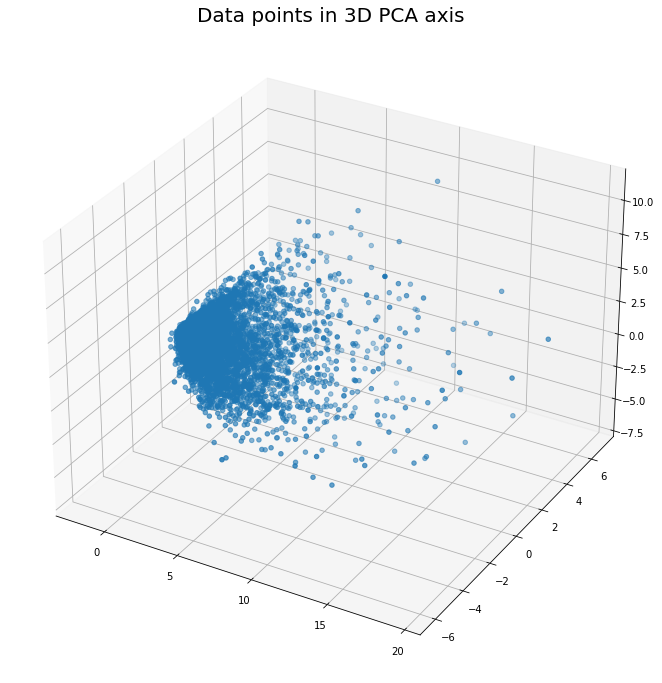

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()


In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia_list = np.empty(8)

for i in range(2,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(tocluster, kmeans.labels_))

AttributeError: 'daal4py._daal4py.kmeans_result' object has no attribute 'goalFunction'

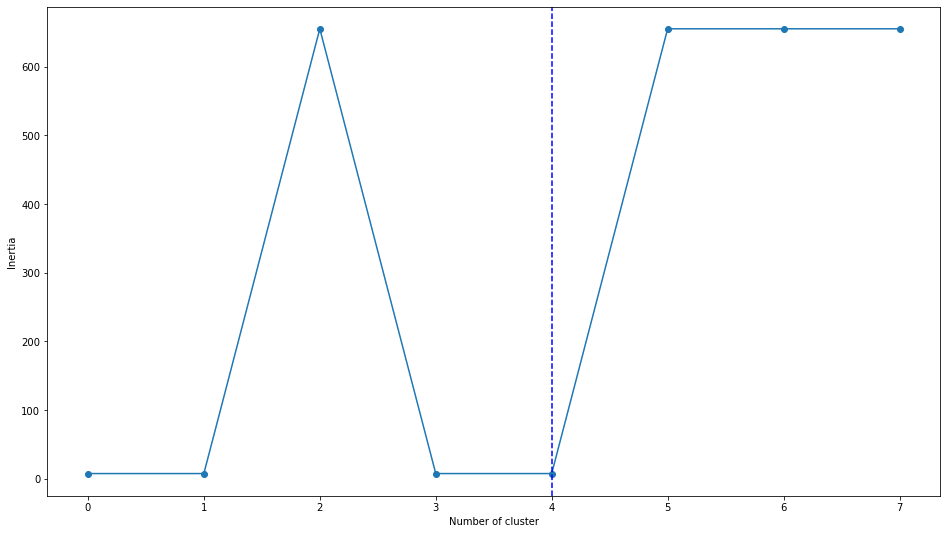

In [30]:
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

In [31]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=4,random_state=30)
clusterer.fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

print(centers)

AttributeError: 'daal4py._daal4py.kmeans_result' object has no attribute 'goalFunction'

NameError: name 'c_preds' is not defined

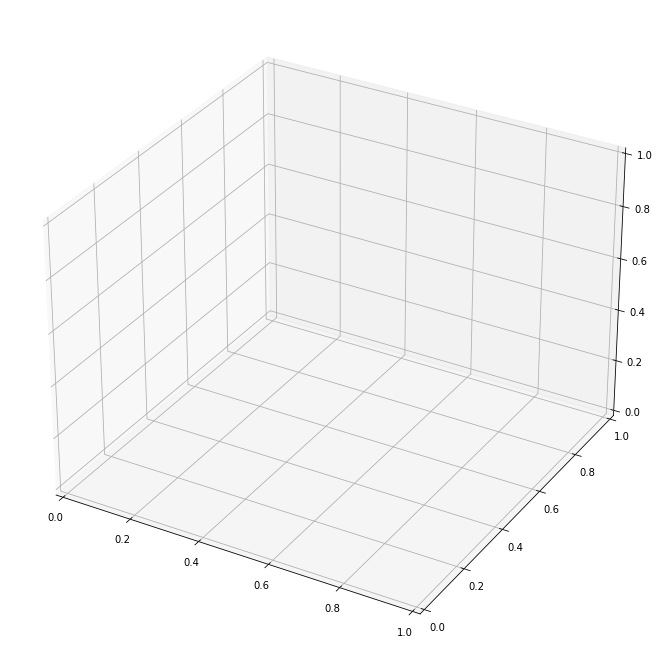

In [32]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)

plt.show()